# <font color=Indigo> Quantum Teleportation of a single qubit</font>

In [102]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex, plot_histogram
from IPython.display import Markdown
import numpy as np

## Create a quantum circuit for 3 qubits and their measurements

In [103]:
qc = QuantumCircuit(3, 3)

### Step 0: Prepare the mysterious qubit $|Q\rangle$ 

|Q > = 0.8|0 > + 0.5999999999999999|1 >


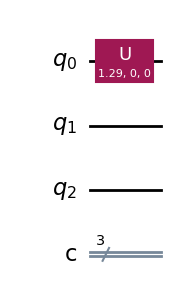

In [104]:
choice = 0 # default choice |Q> = |0>
choice = 1  # |Q> = |1>
choice = 2 # |Q> = (|0> + |1>)/sqrt(2)
choice = 3; a = 0.8; b = np.sqrt(1-a*a)
           # |Q> = a|0> + b|1> [generic superposition]

choice = 3
if choice == 0:
  print('|Q > = |0 >')
elif choice == 1:
  qc.x(0) 
  print('|Q > = |1 >') 
elif choice == 2:
  qc.h(0) 
  print(f'|Q > = .70710678|0 > + .70710678|1 >')
else:
  theta = 2*np.arccos(a); phi = 0
  qc.u(theta, phi, 0, 0) 
  print(f'|Q > = {a}|0 > + {b}|1 >')
qc.draw('mpl')

In [105]:
# Check |\psi>
psi = Statevector(qc)
print(psi)
display(Markdown(r'Three qubit state ='),psi.draw('latex'))
array_to_latex(psi, prefix="(\\text{Three qubit state})^T = ")

Statevector([0.8+0.j, 0.6+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j],
            dims=(2, 2, 2))


Three qubit state =

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###  Step 1: create an entangled Bell pair between Alice and Bob (q1 & q2)

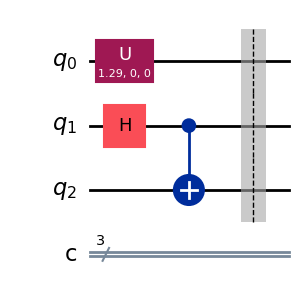

In [106]:
qc.h(1)
qc.cx(1,2)
qc.barrier() # put a barrier to demarcate
qc.draw('mpl')

### Step 2: Alice applies a series of operations between the state to teleport (q0) and her half of the Bell pair (q1)

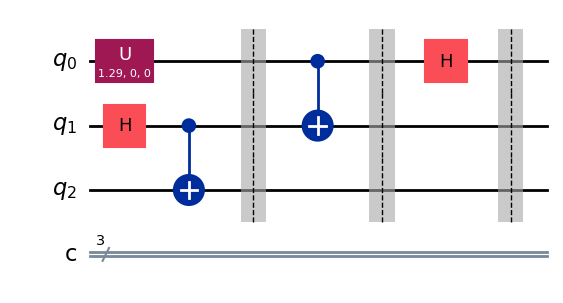

In [107]:
qc.cx(0,1)
qc.barrier()
qc.h(0)
qc.barrier() # put a barrier to visualize 
qc.draw('mpl')

### Step 3: Alice measures on q0 and q1, sends the results to Bob as classical bits

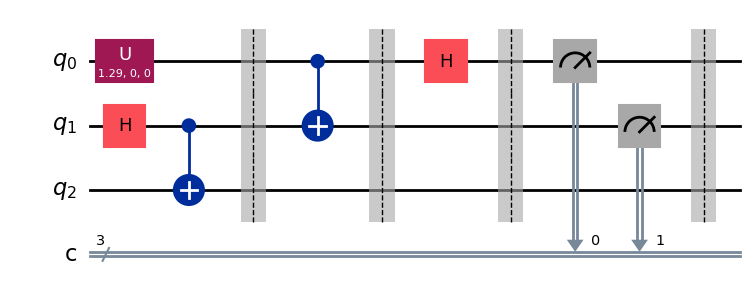

In [108]:
#qc.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.draw('mpl')


### Step 4: Based on Alice's results, Bob performs gates 

In [109]:
qc.cx(1,2)
qc.cz(0,2)

### Let's draw the full circuit

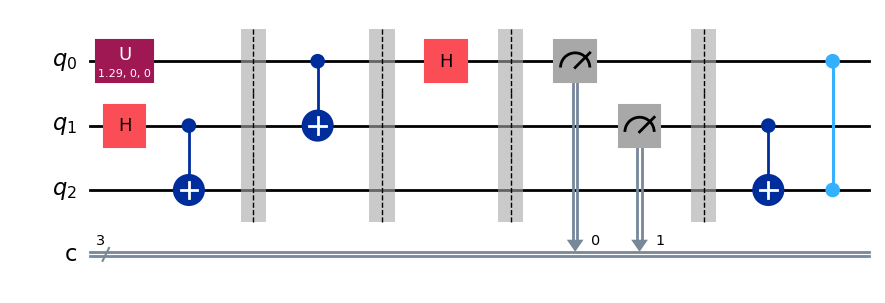

In [110]:
%matplotlib inline
qc.draw(output='mpl')

### Bob measures his state (not a part of teleportation protocol but required for the simulation below)

In [111]:
qc.measure(2,2)

## Simulate the circuit now

Final state = Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


Collapsed 3-qubit state after last measurement =

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Counts: {'101': 928, '110': 924, '100': 862, '001': 1625, '011': 1561, '111': 929, '010': 1524, '000': 1647}
Counts in %: {'101': 9, '110': 9, '100': 8, '001': 16, '011': 15, '111': 9, '010': 15, '000': 16}


$25 a^2 =$

16.0

$ 25 b^2 =$

8.999999999999996

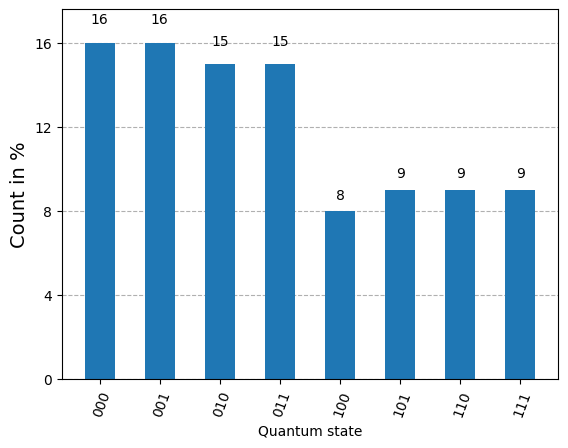

In [112]:
from qiskit import transpile 

# Use AerSimulator
from qiskit_aer import AerSimulator, QasmSimulator


simulator = AerSimulator() # need to import AerSimulator 
simulator = QasmSimulator() # need to import AerSimulator

# Save the statevector into the quantum circuit
qc.save_statevector() # 


# Transpile the circuit for the simulator
qc = transpile(qc, simulator)

# Run job on the simulator/backend 
#job = simulator.run(qobj).result() # obsolete
shots = 10000
job = simulator.run(qc, shots=shots).result() 


# Get final statevector from job
final_state_2 = job.get_statevector()
print('Final state =',final_state_2)
display( Markdown(r'Collapsed 3-qubit state after last measurement ='), final_state_2.draw('latex') )
display(array_to_latex(final_state_2, prefix="(\\text{Three qubit state})^T = "))



# Get counts and plot histogram
counts = job.get_counts(qc)
print('Counts:',counts)
counts_percentage = {state: int((count / shots) * 100) for state, count in counts.items()}
print('Counts in %:',counts_percentage)

fig, ax = plt.subplots()
#plot_histogram(counts, ax=ax) # raw count, no percentage conversion
plot_histogram(counts_percentage, ax=ax)
ax.set_xlabel('Quantum state')
ax.set_ylabel('Count in %')
#plot_histogram(job.get_counts())

display( Markdown(r'$25 a^2 =$'),25*a*a, Markdown(r'$ 25 b^2 =$'),25*b*b ) 

#### Remark: In the above historgram you can see that the 3rd qubit (Bob's state) has nearly $100|a|^2/4 = 25 |a|^2$% states have probabilities to be in state $|0\rangle$ and  nearly $100|b|^2/4 = 25 |b|^2$% probablities to be in state $|1\rangle$. So Bob successfully reproduces state $|Q\rangle$ in his lab. 